# <center>Electrical Energy prediction of Power Plant

**In this project**
- applying keras seqential model
- visulaizing the loss and val loss through 100 epoch

**Link of datasets**
- https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#------------------sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#from sklearn.preprocessing import tra
#-------------- tensorflow- keras
from tensorflow import keras
#import model
from keras.models import Sequential
# import the layers
from keras.layers import Dense

In [2]:
df=pd.read_excel("Folds5x2_pp.xlsx")
print(df.shape)
df.head(3)

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


### Exploratory Data Analysis
- check for **Missing** values
- check statics for **numerical features**
- labeling **categorical features**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
# checking for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
# checking postive values
(df < 0).values.any()

False

In [6]:
# statistical representation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


<AxesSubplot:>

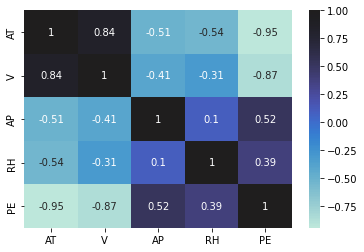

In [7]:
# Correlation
sns.heatmap(df.corr(),center=True,annot=True)

In [8]:
# separion Features and Target matrix
X=df.drop(["PE"],axis=1).values
y=df["PE"].values

In [9]:
# Separting traing testing validating sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=40)
print(df.shape,X_train.shape, X_test.shape)

(9568, 5) (7654, 4) (1914, 4)


In [10]:
# scalling
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.min(),X_train.max())

0.0 1.0000000000000002


### Building Neural Network Model
- Building Arcitucture
    - sequential model
    - hidden layers
    - output layer
    - activation function
- Model compile
- Model traning

In [11]:
model=Sequential()
model.add(Dense(6,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="adam",
             loss="mean_squared_error")
print(model.loss)# print the type of loss function

mean_squared_error


In [13]:
model.fit(X_train,y_train,
          epochs=100,
          batch_size = 32,
          verbose=1,
         validation_data=(X_test,y_test))

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 204766.2969 - val_loss: 200989.9531
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 188133.6719 - val_loss: 171129.5781
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 143798.8281 - val_loss: 113619.8672
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 80991.9141 - val_loss: 51058.8164
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 29613.9062 - val_loss: 14241.4629
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 7824.8105 - val_loss: 4432.9165
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 3692.4126 - val_loss: 3290.9409
Epoch 8/100
240/240 [==============================] - 1s 2ms/step - loss: 3268.0120 - val_loss: 3113.6201
Epoch 9/100
240/240 [==============================] - 1s 2ms/step - loss: 3132.5964 - val_loss: 2982.6968
Epoch 10/100
240/240 

Epoch 78/100
240/240 [==============================] - 0s 2ms/step - loss: 21.3487 - val_loss: 20.3604
Epoch 79/100
240/240 [==============================] - 0s 2ms/step - loss: 21.2855 - val_loss: 21.1907
Epoch 80/100
240/240 [==============================] - 0s 2ms/step - loss: 21.2637 - val_loss: 20.0271
Epoch 81/100
240/240 [==============================] - 0s 2ms/step - loss: 21.2954 - val_loss: 20.0205
Epoch 82/100
240/240 [==============================] - 0s 2ms/step - loss: 21.1867 - val_loss: 19.8310
Epoch 83/100
240/240 [==============================] - 1s 2ms/step - loss: 21.2615 - val_loss: 19.8193
Epoch 84/100
240/240 [==============================] - 1s 3ms/step - loss: 21.3197 - val_loss: 20.0234
Epoch 85/100
240/240 [==============================] - 1s 2ms/step - loss: 21.2572 - val_loss: 19.8929
Epoch 86/100
240/240 [==============================] - 1s 2ms/step - loss: 21.2372 - val_loss: 20.5757
Epoch 87/100
240/240 [==============================] - 0s 2ms/s

In [14]:
print(model.history.history.keys())
model_loss=pd.DataFrame(model.history.history)
model_loss.head()

dict_keys(['loss', 'val_loss'])


,loss,val_loss
0,204766.296875,200989.953125
1,188133.671875,171129.578125
2,143798.828125,113619.867188
3,80991.914062,51058.816406
4,29613.906250,14241.462891


<AxesSubplot:>

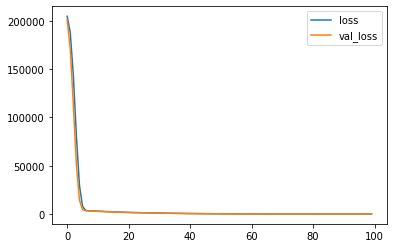

In [15]:
model_loss.plot()